
# Partial Derivatives

In lectures, we were introduced to the idea of a function of multiple variables. Surfaces of objects can be expressed as functions of multiple independent variables. 

Partial differentiation is our method to determine how the surface is changing with respect to one of these variables, and requires that we hold the other variable fixed as a constant. All of the rules of ordinary differentiation (that we learned prior to University and in MAT101) still hold, including chain and quotient rules.

By partial differentiation of a function of multiple variables representing a surface, we can determine the surface tangents and normal to that surface.


In [2]:
## Libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sym

## Recap of lecture content

Partial differentiation states that we deal with one variable at a time, and *temporarily* treat the other variable as a constant (or just a number).

In partial differentiation, we often used $x$ and $y$ as the independent varibles, and $z$ or $f$ as functions or dependent variables, $z(x,y)$ or $f(x,y)$.

In [3]:
x, y = sym.Symbol('x'), sym.Symbol('y')

### Ordinary differentiation ###

Let us first consider an ordinary function of the type we have worked with for many years: $f(x)=x^2+3$.


In [6]:
f = 5*x**2+3
f

5*x**2 + 3

Python can calculate the ordinary derivative for this function, $f'(x)$, really easily:

In [8]:
sym.diff(f,x)

10*x

Python will also automatically apply more complicated rules like chain and quotient rules for differentiating trickier functions through the diff command. In this example, we can define a second function, $g(x)$, and multiply $f(x)$ and $g(x)$; the quotient rule says that the derivative of both functions multiplied together is given by $f'(x)*g(x)+f(x)*g'(x)$:

In [11]:
g = x**3
sym.diff(f,x)*g+f*sym.diff(g,x)

10*x**4 + 3*x**2*(5*x**2 + 3)

Python does this automatically in one:

In [12]:
sym.diff(f*g,x)

10*x**4 + 3*x**2*(5*x**2 + 3)

### Partial differentiation ###

Lets see what happens when we ask Python to handle functions of multiple variables, like the one seen in the lecture:

In [13]:
z = 2*x**3*y+x**2*y**4

To differentiate with respect to $x$, Python treats $y$ as a constant; we can continue to use the diff command to calculate $\frac{\partial z}{\partial x}$:

In [14]:
sym.diff(z, x)

6*x**2*y + 2*x*y**4

and $\frac{\partial z}{\partial y}$:

In [15]:
sym.diff(z, y)

2*x**3 + 4*x**2*y**3

These derivatives are also the tangents to this surface in the $x$ and $y$ directions.

Chain and quotient rule are also still directly carried over: what if we need the x-tangent to the surface $z$ given by $z=2\cos{(xy)}+3\sin{(2xy)}$?

In [17]:
z = 2*sym.cos(x*y)+3*sym.sin(2*x*y)
sym.diff(z, x)

-2*y*sin(x*y) + 6*y*cos(2*x*y)

We also spent some time in the lectures discussing *symmetric functions*, which are useful to identify: if you identify a function as symmetric, then the behaviour in one derivative will match the behaviour in the other derivative. This can save time on calculations, or setting up functions to describe behaviour.

### Second Order Partial Derivatives ###

The rules that we know also roll over to higher order derivatives. In MAT201, it can be useful to know how to calculate derivatives upto and including second order. Python also does this with ease.

Replicating the practical example from the lectures where $f(x,y)=x^2y+3y^2x-\frac{2x}{y}$, the second order derivative $\frac{\partial^2 f}{\partial x^2}$ can be found as follows:

In [21]:
f = x**2*y+3*y**2*x-2*x/y
sym.diff(f,x,x)

2*y

In [22]:
sym.diff(f,y,y)

2*x*(3 - 2/y**3)

We can also use Python to check if $\frac{\partial^2 f}{\partial x\partial y}=\frac{\partial^2 f}{\partial y \partial x}$:

In [24]:
sym.diff(f,x,y)-sym.diff(f,y,x)

0

### Turning Points and their nature ###
The final part of the lecture showed us that we can use partial derivatives to evaluate turning points in a given function, to identify if they are maxima, minima or saddle-points (points which behave like maxima *and* minima at the same time.

In the lectures we used the following example: $f(x,y)=(x^2-1)(y^2-4)$.
We found the critical points by evaluating where $f_x=0$ and $f_y=0$:

In [93]:
f = (x**2-1)*(y**2-4)
fx = sym.diff(f,x)
fy = sym.diff(f,y)

Lets first solve the equation $f_x=0$; Python will tell us what values of $x$ and $y$ satisfy this equation:

In [94]:
sols1 = sym.solve(fx,[x,y])
sols1

[(0, y), (x, -2), (x, 2)]

Each pair represents a solution: it knows that for one solution, $x=0$ for some value of $y$. It also can work out that $y=-2$ and $y=+2$ are solutions, for an unknown $x$.
We'll take each of these partial solutions and feed them into the other equation $f_y=0$, to see what the remaining unknown is.
First, when $x=0$, $y$ must be:

In [95]:
sym.solve(fy.subs(x,sols1[0][0]),y)

[0]

For the missing values of x, we feed in $y=-2$:

In [96]:
sym.solve(fy.subs(y,sols1[1][1]),x)

[-1, 1]

..and $y=+2$..

In [97]:
sym.solve(fy.subs(y,sols1[2][1]),x)

[-1, 1]

Thus we corroborate the turning points in the lectures, found at $(0,0)$, $(-1,-2)$, $(-1,2)$, $(1,2)$ and $(1,-2)$.

The nature of these turning points is determined by the 2nd Derivative Test described in the lectures.
For this we need to evaluate $f_{xx} f_{yy} - f_{xy}^2$.
If this quantity is negative, the position is a *saddle point*.
If positive, and $f_{xx}$ is negative, the position is a *maximum point*.
If positive, and $f_{xx}$ is positive, this is a *minimum point*.
I will use nested if statements to run the test on each critical point:

In [114]:
fxx = sym.diff(fx,x)
fyy = sym.diff(fy,y)
fxy = sym.diff(fx,y)
test = fxx*fyy-fxy*fxy
test
pos = [0,0]
if (test.subs([(x,pos[0]),(y,pos[1])]) > 0):
    if (fxx.subs([(x,pos[0]),(y,pos[1])]) > 0):
        print('min point found at', pos)
    else:
        print('max point found at', pos)

else:
    print('saddle point found at', pos)

max point found at [0, 0]


As shown in the lectures, $(0,0)$ is a local maximum. Python is really powerful, so we can actually plot this function in the vicinity of the point in 3D to confirm our suspicions:

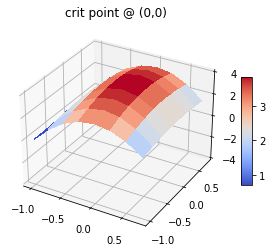

In [115]:
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-1, 1, 0.25)
Y = np.arange(-1, 1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X*X-1)*(Y*Y-4)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-4.01, 4.01)
ax.title.set_text('crit point @ (0,0)')
fig.colorbar(surf, shrink=0.5, aspect=10)

Now if we check one of the other points:

In [116]:
pos = [-1,2]
if (test.subs([(x,pos[0]),(y,pos[1])]) > 0):
    if (fxx.subs([(x,pos[0]),(y,pos[1])]) > 0):
        print('min point found at', pos)
    else:
        print('max point found at', pos)

else:
    print('saddle point found at', pos)

saddle point found at [-1, 2]


All the other points in the lecture example were found to be saddle points. We can also visually confirm this finding, by viewing the 3D variation of the surface near these critical points too:

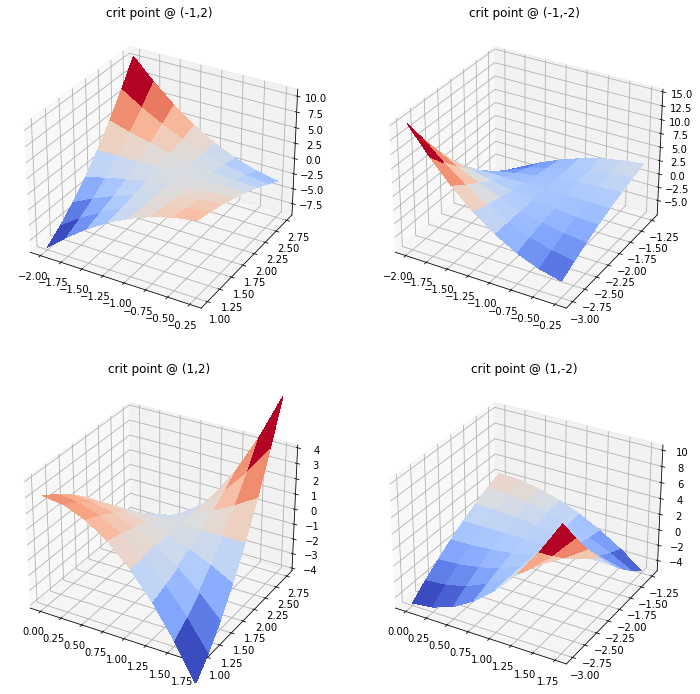

In [117]:
fig = plt.figure(figsize=(12,24))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(0, 2, 0.25)
Y = np.arange(1, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X*X-1)*(Y*Y-4)
surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.set_zlim(-4.01, 4.01)
ax1.title.set_text('crit point @ (1,2)')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
X = np.arange(0, 2, 0.25)
Y = np.arange(-3, -1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X*X-1)*(Y*Y-4)
surf = ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2.title.set_text('crit point @ (1,-2)')

ax3 = fig.add_subplot(2, 2, 1, projection='3d')
X = np.arange(-2, 0, 0.25)
Y = np.arange(1, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X*X-1)*(Y*Y-4)
surf = ax3.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3.title.set_text('crit point @ (-1,2)')

ax4 = fig.add_subplot(2, 2, 2, projection='3d')
X = np.arange(-2, 0, 0.25)
Y = np.arange(-3, -1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X*X-1)*(Y*Y-4)
surf = ax4.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax4.title.set_text('crit point @ (-1,-2)')
plt.show()

From the images, the four critical points all have the classic shape of a saddle point, with a local max in one direction and a local min in the other.

## Over to You
You have seen in this workbook that Python can help with the mathematics of partial differentiation. 
Use these tools to potentially visualise problems and help with some of the steps. Try these code snippets on some of the homework examples.
Remember: In the exam you will not have access to Python help, so this should augment your learning only!
